<a href="https://colab.research.google.com/github/trujoan/Inteligencia-Artificial/blob/main/Watershed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La librería de Watershed en el contexto de procesamiento de imágenes se refiere al algoritmo de Watershed, que es una técnica utilizada principalmente para segmentación de imágenes. La segmentación de imágenes se refiere al proceso de dividir una imagen en regiones o segmentos significativos con el objetivo de simplificar la representación de una imagen y/o facilitar el análisis.

Funciones principales del algoritmo de Watershed:

Segmentación de objetos: El algoritmo de Watershed puede identificar y separar objetos individuales o regiones en una imagen, incluso si los objetos están muy cerca o se superponen parcialmente.

Detección de bordes: Puede ser usado para detectar bordes precisos en una imagen, lo cual es útil en aplicaciones de visión por computadora como la detección de contornos.

Procesamiento de imágenes médicas: En aplicaciones médicas, como la segmentación de órganos en imágenes de resonancia magnética o tomografía computarizada, el algoritmo de Watershed es utilizado para separar estructuras anatómicas.

Principio básico del algoritmo de Watershed:

El algoritmo se basa en analizar la imagen como un relieve topográfico, donde los píxeles más brillantes se consideran como picos y los píxeles más oscuros como valles.

Inicia con una inundación imaginaria desde los picos de la imagen y permite que el "agua" fluya hacia los valles. Esto crea "cuencas" que representan regiones separadas en la imagen.

Las líneas divisorias entre las cuencas, llamadas líneas de crestas de Watershed, representan los bordes entre los objetos o regiones en la imagen.

Aplicaciones comunes:

Segmentación de imágenes médicas: Para analizar imágenes médicas y detectar órganos o anomalías específicas.

Análisis de imágenes satelitales: Para identificar y segmentar diferentes tipos de terreno, vegetación, o estructuras urbanas.

Reconocimiento de objetos y visión por computadora: Para extraer características y facilitar la detección y clasificación de objetos en imágenes.

En resumen, la librería de Watershed (parte de bibliotecas como OpenCV en Python) proporciona una herramienta poderosa para la segmentación y análisis de imágenes, permitiendo una comprensión detallada y automatizada de la información visual contenida en las imágenes digitales.

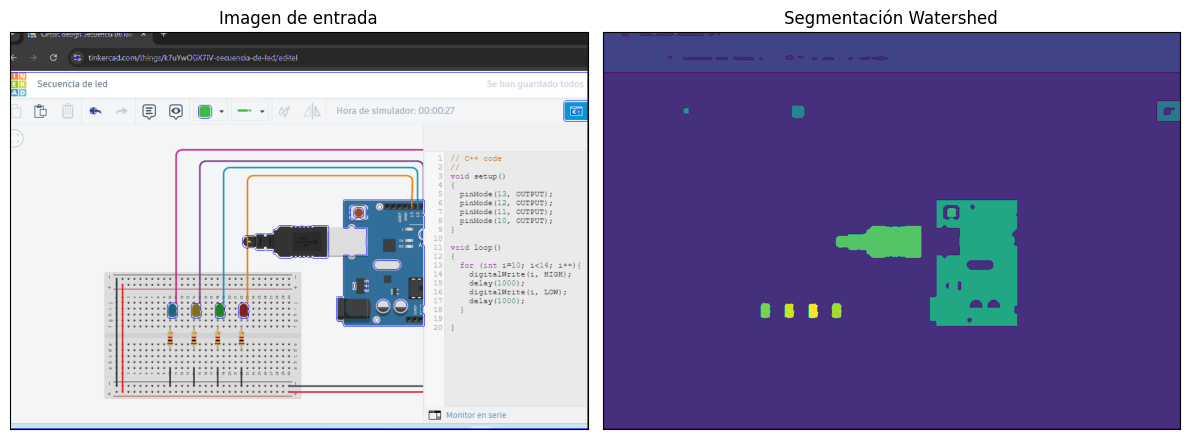

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


# Cargar la imagen
image_url = "/content/Captura de pantalla 2024-08-02 090653.png"
img = cv2.imread(image_url)

# Convertir a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Aplicar umbralización
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Aplicar el algoritmo de Watershed
# Remover el ruido de la imagen
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Dilatar el área de fondo para asegurarnos de que no esté incluida en la región de primer plano
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Encontrar el área desconocida
sure_fg = cv2.erode(opening, kernel, iterations=2)
sure_fg = cv2.dilate(sure_fg, kernel, iterations=3)

# Etiquetar los marcadores y aplicar el algoritmo de Watershed
unknown = cv2.subtract(sure_bg, sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0
markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0]


# Mostrar resultados
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Imagen de entrada'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(markers, cmap='viridis')
plt.title('Segmentación Watershed'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()
